In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## 1. Import Dataset

In [3]:
train = pd.read_csv('/home/kevinxu/data/in/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/home/kevinxu/data/in/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

Text(0, 0.5, 'Sales Price')

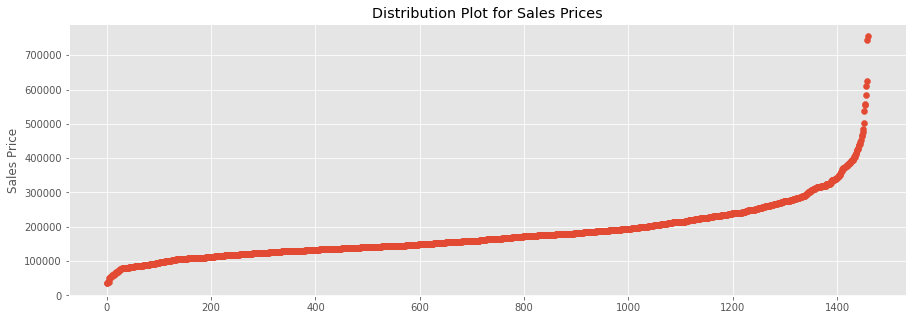

In [6]:
plt.figure(figsize=(15,5))
plt.scatter(train.index, train.SalePrice.sort_values().reset_index(drop=True))
plt.title("Distribution Plot for Sales Prices")
plt.ylabel("Sales Price")

## 2. Handle Missing Values

<AxesSubplot:>

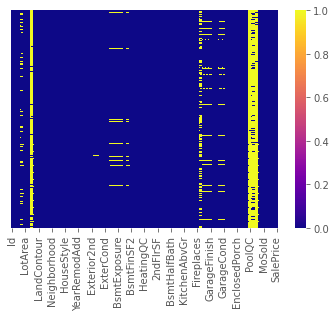

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='plasma')

In [10]:
train.isnull().sum().sort_values(ascending=False)[:19]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [11]:
train.LotFrontage.isnull().sum()

259

In [12]:
train['LotFrontage'].fillna(train.LotFrontage.mean(), inplace=True)
test['LotFrontage'].fillna(test.LotFrontage.mean(), inplace=True)

In [13]:
train.Alley.value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [14]:
train.drop(columns=['Alley'], inplace=True)
test.drop(columns=['Alley'], inplace=True)

In [18]:
drop = ['GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature']

for col in drop:
    train.drop(columns=col, inplace=True)
    test.drop(columns=col, inplace=True)

In [15]:
train.BsmtCond.value_counts(dropna=False)

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [16]:
train['BsmtCond'].fillna(train.BsmtCond.mode()[0], inplace=True)
test['BsmtCond'].fillna(test.BsmtCond.mode()[0], inplace=True)

In [17]:
rp_mode = ['BsmtQual', 'FireplaceQu', 'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 
        'MasVnrType', 'MasVnrArea', 'BsmtExposure','BsmtFinType2']

for col in rp_mode:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace=True)

In [19]:
train.isnull().sum().sort_values(ascending=False)

BsmtFinType1    37
Electrical       1
SalePrice        0
ExterQual        0
RoofStyle        0
                ..
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Id               0
Length: 76, dtype: int64

In [21]:
train.dropna(inplace=True)
train.drop(columns=['Id'], inplace=True)

In [22]:
train.shape

(1422, 75)

In [23]:
test.isnull().sum().sort_values(ascending=False)[0:17]

BsmtCond        1459
BsmtFinType1      42
MSZoning           4
Utilities          2
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
GarageCars         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
SaleType           1
Exterior2nd        1
Exterior1st        1
KitchenQual        1
TotalBsmtSF        1
GarageArea         1
dtype: int64

In [24]:
test['MSZoning'].fillna(test['MSZoning'].mode()[0], inplace=True)

In [25]:
rp_mode_t = ['BsmtFinType1', 'Utilities','BsmtFullBath', 'BsmtHalfBath', 'Functional', 'SaleType', 
           'Exterior2nd', 'Exterior1st', 'KitchenQual']
rp_mean_t = ['GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',  'TotalBsmtSF', 'GarageArea']

for col in rp_mode_t:
    test[col].fillna(test[col].mode()[0], inplace=True)
for col in rp_mean_t:
    test[col].fillna(test[col].mean(), inplace=True)

In [26]:
test.drop(columns=['Id'], inplace=True)

In [27]:
test.shape

(1459, 74)

In [28]:
train.isnull().any().any() and test.isnull().any().any()

False

## 3. Feature Engineering

In [29]:
columns = ['MSZoning', 'Street','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical','KitchenQual', 'Functional', 
       'FireplaceQu', 'GarageType', 'GarageFinish','GarageQual', 'GarageCond', 'PavedDrive', 
       'SaleType', 'SaleCondition']

In [30]:
len(columns)

39

In [31]:
final_df = pd.concat([train, test], axis=0)

In [32]:
final_df.shape

(2881, 75)

In [33]:
def One_hot_encoding(columns):
    df_final = final_df
    i = 0
    for fields in columns:
        df1 = pd.get_dummies(final_df[fields], drop_first=True)
        
        final_df.drop([fields], axis=1, inplace=True)
        if i == 0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final, df1], axis=1)
        i += 1
        
    df_final = pd.concat([final_df, df_final], axis=1)
    
    return df_final

In [34]:
final_df = One_hot_encoding(columns)

In [35]:
final_df.shape

(2881, 235)

In [72]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [73]:
df_train = final_df.iloc[:1422, :]
df_test = final_df.iloc[1422:, :]

In [74]:
df_test.drop(['SalePrice'], axis=1, inplace=True)

In [75]:
X_train = df_train.drop(['SalePrice'], axis=1)
y_train = df_train['SalePrice']

## 4. Principal Component Analysis

In [76]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X_train)
my_columns = X_train.columns
std_df = pd.DataFrame(X_std, columns = my_columns)

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(std_df)

Text(0, 0.5, 'Second Principal Component')

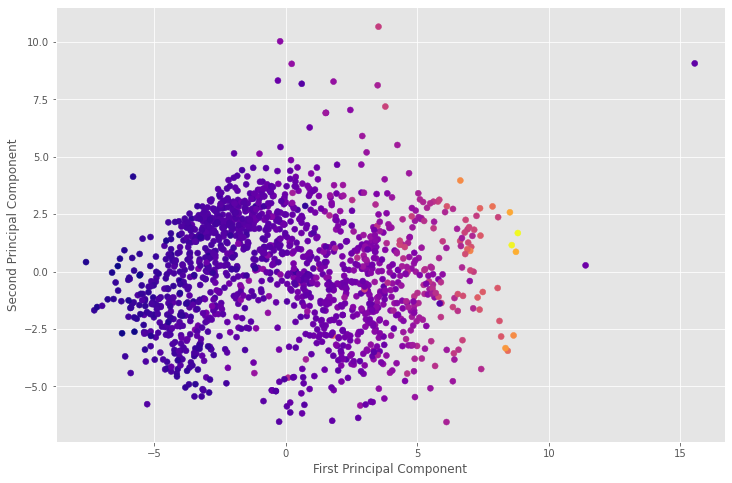

In [78]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=y_train, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

## 5. Hyperparameter Tuning

In [79]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [80]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 500, 900]
criterion = ['mse', 'mae']
depth = [3, 5, 10, 15]
min_split = [2, 3, 4]
min_leaf = [2, 3, 4]
bootstrap = ['True', 'False']
verbose =[5]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':depth,
    'criterion':criterion,
    'bootstrap':bootstrap,
    'verbose':verbose,
    'min_samples_split':min_split,
    'min_samples_leaf':min_leaf
    }

random_cv = RandomizedSearchCV(estimator=rf,
                              param_distributions=hyperparameter_grid,
                              cv=5, scoring='neg_mean_absolute_error',
                              n_jobs=4, return_train_score=True, random_state=42)

In [50]:
random_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 900
building tree 2 of 900
building tree 3 of 900
building tree 4 of 900
building tree 5 of 900
building tree 6 of 900
building tree 7 of 900
building tree 8 of 900
building tree 9 of 900
building tree 10 of 900
building tree 11 of 900
building tree 12 of 900
building tree 13 of 900
building tree 14 of 900
building tree 15 of 900
building tree 16 of 900
building tree 17 of 900
building tree 18 of 900
building tree 19 of 900
building tree 20 of 900
building tree 21 of 900
building tree 22 of 900
building tree 23 of 900
building tree 24 of 900
building tree 25 of 900
building tree 26 of 900
building tree 27 of 900
building tree 28 of 900
building tree 29 of 900
building tree 30 of 900
building tree 31 of 900
building tree 32 of 900
building tree 33 of 900
building tree 34 of 900
building tree 35 of 900
building tree 36 of 900
building tree 37 of 900
building tree 38 of 900
building tree 39 of 900
building tree 40 of 900
building tree 41 of 900
building tree 42 of 900
b

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    9.7s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 5, 10, 15],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [100, 500, 900],
                                        'verbose': [5]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error')

In [51]:
random_cv.best_estimator_

RandomForestRegressor(bootstrap='False', max_depth=10, min_samples_leaf=2,
                      min_samples_split=3, n_estimators=900, verbose=5)

## 6. Train Random Forest Regressor

In [81]:
rf = RandomForestRegressor(bootstrap='True', ccp_alpha=0.0, criterion='mae',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=5, warm_start=False)

In [53]:
rf.fit(X_train, y_train)
y_pred = rf.predict(df_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 900
building tree 2 of 900


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


building tree 3 of 900
building tree 4 of 900


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


building tree 5 of 900
building tree 6 of 900
building tree 7 of 900
building tree 8 of 900
building tree 9 of 900
building tree 10 of 900
building tree 11 of 900
building tree 12 of 900
building tree 13 of 900
building tree 14 of 900
building tree 15 of 900
building tree 16 of 900
building tree 17 of 900
building tree 18 of 900
building tree 19 of 900
building tree 20 of 900
building tree 21 of 900
building tree 22 of 900
building tree 23 of 900
building tree 24 of 900
building tree 25 of 900
building tree 26 of 900
building tree 27 of 900
building tree 28 of 900
building tree 29 of 900
building tree 30 of 900
building tree 31 of 900
building tree 32 of 900
building tree 33 of 900
building tree 34 of 900
building tree 35 of 900
building tree 36 of 900
building tree 37 of 900
building tree 38 of 900
building tree 39 of 900
building tree 40 of 900
building tree 41 of 900
building tree 42 of 900
building tree 43 of 900
building tree 44 of 900
building tree 45 of 900
building tree 46 of 9

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.1s finished


In [54]:
y_pred

array([126637.32777778, 151407.16888889, 182261.10722222, ...,
       156259.14222222, 116634.59611111, 229163.74333333])

In [55]:
pred = pd.DataFrame(y_pred)
ori_test = pd.read_csv('/home/kevinxu/data/in/house-prices-advanced-regression-techniques/test.csv')
sub = pd.concat([ori_test['Id'], pred], axis=1)
sub.columns = ['Id', 'PredSalePrice']

In [56]:
sub

,Id,PredSalePrice
0,1461,126637.327778
1,1462,151407.168889
2,1463,182261.107222
3,1464,177273.679444
4,1465,198358.225556
...,...,...
1454,2915,86541.962222
1455,2916,88006.697778
1456,2917,156259.142222
1457,2918,116634.596111


## 7. Train Xgboost Regressor

In [82]:
import xgboost

xg = xgboost.XGBRegressor()

In [83]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

hyperparameter_grid_xg = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
random_cv = RandomizedSearchCV(estimator=xg,
            param_distributions=hyperparameter_grid_xg,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [84]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   31.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [87]:
xg = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
xg.fit(X_train, y_train)

y_pred_xg = xg.predict(df_test)

In [89]:
y_pred_xg

array([114042.1 , 164575.23, 190523.47, ..., 175098.2 , 117959.04,
       233386.06], dtype=float32)

In [90]:
pred_xg = pd.DataFrame(y_pred_xg)
sub_xg = pd.concat([ori_test['Id'], pred_xg], axis=1)
sub_xg.columns = ['Id', 'SalePrice']

In [91]:
sub_xg

,Id,SalePrice
0,1461,114042.101562
1,1462,164575.234375
2,1463,190523.468750
3,1464,198186.234375
4,1465,189446.468750
...,...,...
1454,2915,86688.562500
1455,2916,68252.546875
1456,2917,175098.203125
1457,2918,117959.039062


In [92]:
sub_xg.to_csv('/home/kevinxu/data/out/sub_xg.csv')